# Importing the required libraries and our Data


In [1]:
#importing Pandas,scikit-learn models for regression and spliting the data and matplotlib for visualisation
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import the data into a dataframe
data = pd.read_csv('Desktop/Python//booking/LifeTimeValue_Train.csv')
data.head()

,userID,bookerCC,international,length_of_stay,channel,bookDate,commission,ltv
0,1,us,0,1,Intercompany,2/22/2017,49.0,52.34
1,2,us,0,3,ShopPPC,6/21/2017,90.0,103.48
2,3,us,0,4,Intercompany,3/10/2017,136.0,155.86
3,5,us,1,3,PPC,1/13/2017,142.6,173.45
4,6,us,0,3,Email,3/3/2017,96.0,107.02


# Convert categorical data to numeric 

In [3]:
#create function to convert channel to numeric 
def Channels(x):
    if x=='Intercompany':
        return 1
    if x=='ShopPPC':
        return 2
    if x=='PPC':
        return 3
    if x=='Email':
        return 4
    if x=='Direct':
        return 5
    
#create function to convert ltv to numeric    
def bookerCC(x):
    if x=='us':
        return 1
    if x=='fr':
        return 2
    if x=='it':
        return 3
    if x=='es':
        return 4
    if x=='gb':
        return 5
    if x=='br':
        return 6
    if x=='au':
        return 7
    if x=='de':
        return 8
    if x=='nl':
        return 9


In [4]:
#apply functions on data
data['Channels'] = data['channel'].apply(Channels)
data['CC'] = data['bookerCC'].apply(bookerCC)

In [5]:
#sanity check
data.head()

,userID,bookerCC,international,length_of_stay,channel,bookDate,commission,ltv,Channels,CC
0,1,us,0,1,Intercompany,2/22/2017,49.0,52.34,1,1
1,2,us,0,3,ShopPPC,6/21/2017,90.0,103.48,2,1
2,3,us,0,4,Intercompany,3/10/2017,136.0,155.86,1,1
3,5,us,1,3,PPC,1/13/2017,142.6,173.45,3,1
4,6,us,0,3,Email,3/3/2017,96.0,107.02,4,1


# Prepare our prediction model 

In [6]:
#selecting the features for our model
features = ['CC', 'international', 'length_of_stay', 'commission', 'Channels']
#selecting the target variable'what we want to predict'
target = ['ltv']

In [7]:
#implement features and target variables
x = data[features]
y = data[target]

In [8]:
#split the data to calculate the Accuracy before we use it on the Real test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

In [9]:
#create Linear regression model and fit the data
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
#predictions to calculate the Accuracy
prediction = regressor.predict(x_test)
prediction

array([[ 180.63794905],
       [ 208.57162023],
       [  48.61240593],
       [  74.05577412],
       [ 178.11287977],
       [  69.90644244],
       [  81.03775482],
       [ 101.53033421],
       [ 124.7479669 ],
       [ 116.4351576 ],
       [ 320.26489784],
       [  25.80240343],
       [ 155.02502478],
       [ 116.45569683],
       [  76.50469447],
       [ 120.34634958],
       [ 112.37543541],
       [  99.18700154],
       [ 488.13250944],
       [  58.53944909],
       [  24.81472289],
       [ 132.94703937],
       [  90.12618143],
       [ 345.54197091],
       [ 103.51196032],
       [ 110.79225146],
       [ 114.55358194],
       [  66.24172589],
       [  59.63204821],
       [ 385.0040652 ],
       [ 117.56436391],
       [ 479.91530229],
       [ 182.87632051],
       [ 251.34057344],
       [ 143.70540672],
       [  44.10844637],
       [  46.70872251],
       [ 120.8351522 ],
       [  44.95264729],
       [  48.53563054],
       [  16.43891434],
       [  84.708

In [11]:
#sanity check
y_test

,ltv
393,182.88
268,199.65
95,49.59
52,72.04
201,171.99
423,69.92
340,75.00
319,91.79
316,128.98
419,108.90


In [12]:
#calculate Accuracy
print("Accuracy on test set: {:.2f}".format(regressor.score(x_test, y_test)))

Accuracy on test set: 0.99


In [13]:
#import extra libraries to get more confedent with our model
import numpy as np
from sklearn.metrics import mean_squared_error

#Calculate RMSE
lin_mse = mean_squared_error(prediction, y_test)
lin_rmse = np.sqrt(lin_mse)
print('The predicted value in Linear Regression Model is within : %.2f' % lin_rmse , 'of the reality')

The predicted value in Linear Regression Model is within : 7.69 of the reality


# Now that we are confident with the Accuracy, 
# we can load the Test Data set to predict the missing LTV

In [14]:
#load data
TestDataset = pd.read_csv('Desktop/Python/booking/LifeTimeValue_Test.csv' ,encoding="latin-1")
TestDataset

,userID,bookerCC,international,length_of_stay,channel,bookDate,commission
0,20,us,1,3,Email,2017-02-27,130.2
1,25,us,0,2,Email,2017-06-01,64.0
2,4,us,1,10,ShopPPC,2017-02-09,333.3
3,49,us,0,3,Intercompany,2017-05-13,99.0
4,114,it,0,1,Intercompany,2017-03-10,29.0
5,115,it,1,3,Intercompany,2017-02-22,114.7
6,89,fr,0,3,ShopPPC,2017-02-07,84.0
7,90,fr,0,3,Direct,2017-03-07,78.0
8,91,fr,1,2,Direct,2017-04-25,86.1
9,158,es,0,1,Direct,2017-06-08,37.0


In [15]:
#apply functions to get numeric values
TestDataset['Channels'] = TestDataset['channel'].apply(Channels)
TestDataset['CC'] = TestDataset['bookerCC'].apply(bookerCC)

In [16]:
#predict
FinalPredictions = regressor.predict(TestDataset[['CC', 'international', 'length_of_stay', 'commission', 'Channels']])

In [17]:
FinalPredictions

array([[ 161.18234754],
       [  71.51081918],
       [ 423.41218436],
       [ 113.75825001],
       [  23.17020503],
       [ 138.70768663],
       [  95.94434488],
       [  91.42332111],
       [ 105.51718848],
       [  37.04087202],
       [  60.67228704],
       [ 202.22758728],
       [  52.73172659],
       [ 530.7411331 ],
       [  33.04511823],
       [ 438.86267301],
       [  94.19312624],
       [  50.95576569],
       [ 118.39570366]])

# Now we can see that Commission is the most important feature in our model

In [19]:
#we will use Gradient Boosting Regressor to find the importance of our columns
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(x, y)

C:\Users\muthana.hamad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [20]:
feature_labels = np.array(['CC', 'international', 'length_of_stay', 'commission', 'Channels'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

international-6.14%
length_of_stay-10.69%
Channels-11.72%
CC-14.67%
commission-56.78%


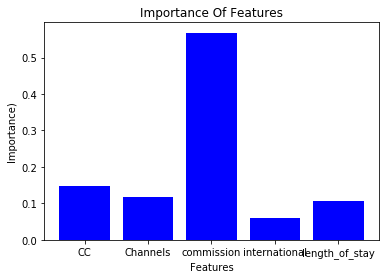

In [21]:
#Visualize Results
plt.bar(feature_labels, importance, color='blue')
plt.xlabel("Features")
plt.ylabel("Importance)")
plt.title("Importance Of Features")
plt.show()